# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"

## 2. Load the dataset [1 point]

In [3]:
df = pd.read_csv(url, encoding='latin1', header=None, names=['Sentiment', 'Headline'])
df.head()

,Sentiment,Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## 3. Explore the dataset [10 points]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
print(df['Sentiment'].value_counts())

Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


In [6]:
print(df.isnull().sum())

Sentiment    0
Headline     0
dtype: int64


In [7]:
print(df.describe())

       Sentiment                                           Headline
count       4846                                               4846
unique         3                                               4838
top      neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq        2879                                                  2


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


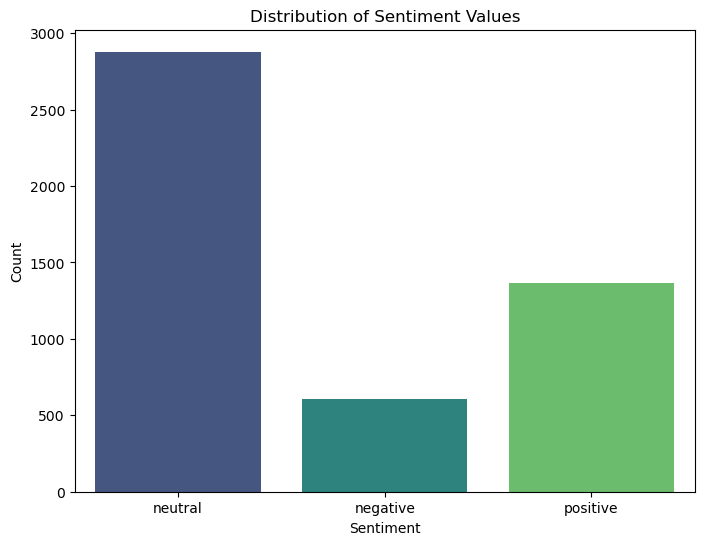

In [8]:
#Bar chart to sentiment column
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment Values')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


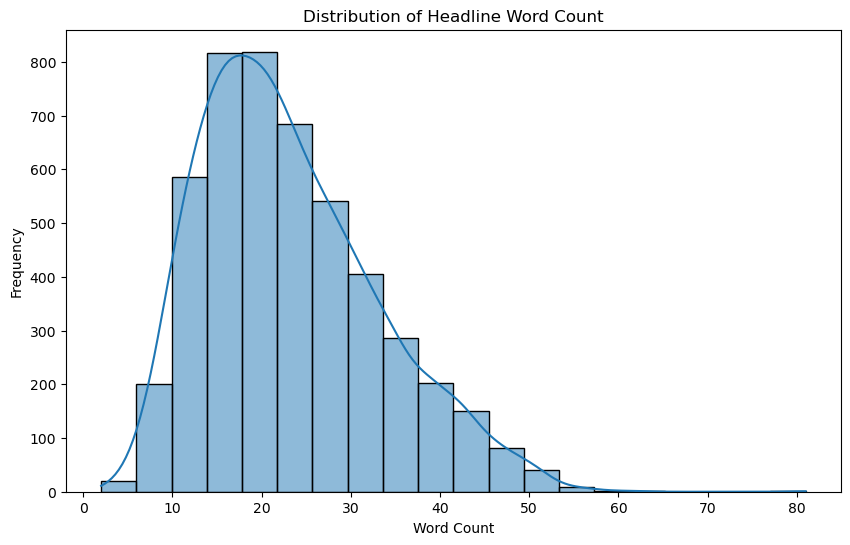

In [9]:
df['headline_word_count'] = df['Headline'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_word_count'], bins=20, kde=True)
plt.title('Distribution of Headline Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## 4. Clean the data [5 points]

In [10]:
#Lowercasing
df['Headline'] = df['Headline'].str.lower()
#Removing Punctuations
df['Headline'] = df['Headline'].str.replace('[^\w\s]', '')

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#Removing StopWords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
df['Headline'] = df['Headline'].apply(lambda x: ''.join([word for word in x.split() if word.lower() not in stopwords]))

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df is already loaded with column names 'sentiment' and 'headline'
X = df['Headline']
y = df['Sentiment'].astype(str)  # Ensure 'sentiment' is of type string

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)



In [14]:
#!pip install --upgrade imbalanced-learn scikit-learn threadpoolctl


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [15]:
X = df['Headline']
y = df['Sentiment']

In [16]:
print(df.dtypes)

Sentiment              object
Headline               object
headline_word_count     int64
dtype: object


In [17]:
df['Sentiment'] = df['Sentiment'].astype(str)


In [18]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

## 6. BoW model [15 points]

In [19]:
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(X)

## 7. Tf-idf model [15 points]

In [20]:
#Build a Tf-Idf model
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(X)

## 8. Split train test data [3 points]

In [21]:
#splitting training and test data
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf = train_test_split(X_tfidf, test_size=0.2, random_state=42)


## 9. Classification Algorithm [10 points]
- Train
- Predict

In [22]:
#Random Forest classifier with BoW features
rf_classifier_bow = RandomForestClassifier(random_state=42)
rf_classifier_bow.fit(X_train_bow, y_train)
y_pred_rf_bow = rf_classifier_bow.predict(X_test_bow)

## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [23]:
#Naive Bayes classifier with Tf-Idf features
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)


## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

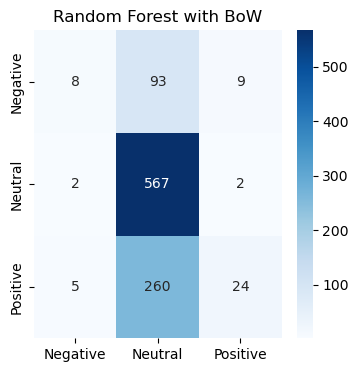

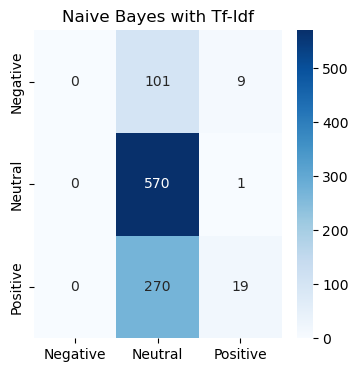

In [24]:
# Random Forest with BoW
conf_matrix_rf_bow = confusion_matrix(y_test, y_pred_rf_bow)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_rf_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Random Forest with BoW')
plt.show()

# Naive Bayes with Tf-Idf
conf_matrix_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_nb_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Naive Bayes with Tf-Idf')
plt.show()